In [1]:
%config IPCompleter.greedy=True
%matplotlib notebook
import lib
lib.setup_logger('info', logfile='/home/adebahr/apercal/ipython-notebooks/commissioning/APERTIF/Bandpass_stability.log')
import apercal

root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adebahr/apercal/ipython-notebooks/commissioning/APERTIF/Bandpass_stability.log


Setup logger with lib.setup_logger()


In [ ]:
prepare = apercal.prepare('/home/adebahr/apercal/ipython-notebooks/commissioning/APERTIF/Bandpass_stability.cfg')

In [ ]:
prepare.go()

In [2]:
preflag = apercal.preflag('/home/adebahr/apercal/ipython-notebooks/commissioning/APERTIF/Bandpass_stability.cfg')

PREFLAG - INFO : ### Configuration file /home/adebahr/apercal/ipython-notebooks/commissioning/APERTIF/Bandpass_stability.cfg successfully read! ###


In [3]:
# This step gives an error in the end, but runs as intended. Have to fix this later
preflag.go()

PREFLAG - INFO : ### Starting pre-flagging of known flags ###
PREFLAG - INFO : # Moved to directory /data/adebahr/apertif/100608_3C48/raw #
PREFLAG - INFO : # Flagging auto-correlations for flux calibrator data #
PREFLAG - INFO : # Auto-correlation flagging for flux calibrator data done #
PREFLAG - INFO : # Flagging shadowed antennas for flux calibrator data #
PREFLAG - INFO : # Flagging of shadowed antennas for flux calibrator data done #
PREFLAG - INFO : ### Pre-flagging of known flags done ###
PREFLAG - INFO : ### Doing pre-flagging with AOFlagger ###


TypeError: a float is required

In [4]:
convert = apercal.convert('/home/adebahr/apercal/ipython-notebooks/commissioning/APERTIF/Bandpass_stability.cfg')

CONVERT - INFO : ### Configuration file /home/adebahr/apercal/ipython-notebooks/commissioning/APERTIF/Bandpass_stability.cfg successfully read! ###


In [5]:
convert.go()

CONVERT - INFO : ########## FILE CONVERSION started ##########
CONVERT - INFO : ### Starting conversion from MS to UVFITS format ###
CONVERT - INFO : # Moved to directory /data/adebahr/apertif/100608_3C48/crosscal #
CONVERT - INFO : ### Using CASA toolkit to convert from MS to UVFITS format! ###
CONVERT - INFO : ### Converted MS file 3C48.MS to UVFITS using CASA toolkit! ###
CONVERT - INFO : ### Conversion from MS to UVFITS format done! ###
CONVERT - INFO : ### Starting conversion from UVFITS to MIRIAD format ###
CONVERT - INFO : ### Using MIRIAD fits task to convert data from UVFITS to MIRIAD format ###
CONVERT - INFO : ### Converted UVFITS file 3C48.MS to MIRIAD format using MIRIAD task fits! ###
CONVERT - INFO : ### Conversion from UVFITS to MIRIAD format done! ###
CONVERT - INFO : ########## FILE CONVERSION done ##########


In [6]:
# Calibrate the flux calibrator now
# Initialise the crosscal module
ccal = apercal.ccal('/home/adebahr/apercal/ipython-notebooks/commissioning/APERTIF/Bandpass_stability.cfg')

CROSSCAL - INFO : ### Configuration file /home/adebahr/apercal/ipython-notebooks/commissioning/APERTIF/Bandpass_stability.cfg successfully read! ###


In [7]:
# Set the parameters for the bandpass calibration
gainint = '60' # Solution interval for calibrator gains
gapint = '60' # Maximum time gap in data until a new solution interval starts
bpint = '60' # Solution interval for the bandpass

# Execute the bandpass calibration
mfcal = lib.miriad('mfcal')
mfcal.vis = ccal.fluxcal
# Comment the next line out if you don't want to solve for delays
mfcal.options = 'delay'
mfcal.stokes = 'XX'
mfcal.interval = gainint + ',' + gapint + ',' + bpint
mfcal.go()

['MfCal: $Revision: 1.20 $, $Date: 2017/05/08 02:31:10 $',
 'Reading the data ...',
 'Number correlations accepted: 12568106',
 'Number of frequency bands/settings: 1',
 'Number of polarisations selected: 1',
 'Number of solution intervals: 4',
 'Number of passband solution intervals: 4',
 'Initialising ...',
 'Using known frequency variation of 3c48',
 'Generating initial solution estimate ...',
 'Doing solution refinement ...',
 'Iter= 1, Solution Error:  1.358',
 'Iter= 2, Solution Error:  1.000',
 'Iter= 3, Solution Error:  0.308',
 'Iter= 4, Solution Error:  0.130',
 'Iter= 5, Solution Error:  0.175',
 'Iter= 6, Solution Error:  0.213',
 'Iter= 7, Solution Error:  0.254',
 'Iter= 8, Solution Error:  0.192',
 'Iter= 9, Solution Error:  0.168',
 'Iter=10, Solution Error:  0.284',
 'Iter=11, Solution Error:  0.462',
 'Iter=12, Solution Error:  0.283',
 'Iter=13, Solution Error:  0.224',
 'Iter=14, Solution Error:  0.151',
 'Iter=15, Solution Error:  0.188',
 'Iter=16, Solution Error:

In [8]:
import subs.readmirlog
values, freqs = subs.readmirlog.get_bp(ccal.crosscaldir + '/' + ccal.fluxcal)

In [9]:
# The bandpass results are ordered in a 3D numpy array now in the following order (antenna, frequency, solution interval)
print(values)

[[[ 0.64928  0.65051  0.64772  0.64697]
  [ 0.66708  0.66579  0.66592  0.67001]
  [ 0.72471  0.72529  0.73084  0.72099]
  ..., 
  [ 1.13299  1.12879  1.12593  1.12938]
  [ 1.03272  1.02164  1.02981  1.0309 ]
  [ 0.94377  0.94623  0.94056  0.94029]]

 [[ 0.62129  0.62196  0.6233   0.62231]
  [ 0.63477  0.63682  0.63808  0.63951]
  [ 0.69376  0.69308  0.69016  0.68572]
  ..., 
  [ 1.18436  1.19134  1.18702  1.19413]
  [ 1.0835   1.08269  1.08303  1.07907]
  [ 0.99131  0.99141  0.98972  0.99139]]

 [[ 0.59213  0.59156  0.58927  0.59291]
  [ 0.63948  0.6415   0.64477  0.63875]
  [ 0.7066   0.70255  0.70325  0.70965]
  ..., 
  [ 1.14649  1.14722  1.14954  1.14787]
  [ 1.04827  1.04332  1.04802  1.04118]
  [ 0.95244  0.95371  0.95898  0.95526]]

 ..., 
 [[ 0.64707  0.64488  0.64533  0.64753]
  [ 0.66737  0.66121  0.66411  0.66286]
  [ 0.72086  0.72417  0.72091  0.72486]
  ..., 
  [ 1.14155  1.13868  1.14469  1.14545]
  [ 1.04429  1.04461  1.04328  1.04418]
  [ 0.95676  0.95479  0.9563   0.95

In [10]:
# In addition it gives the 1D-array of the frequency axis. The unit is GHz.
print(freqs)

[ 1.307019   1.3070313  1.3070434 ...,  1.4413574  1.4413697  1.4413818]


<IPython.core.display.Javascript object>


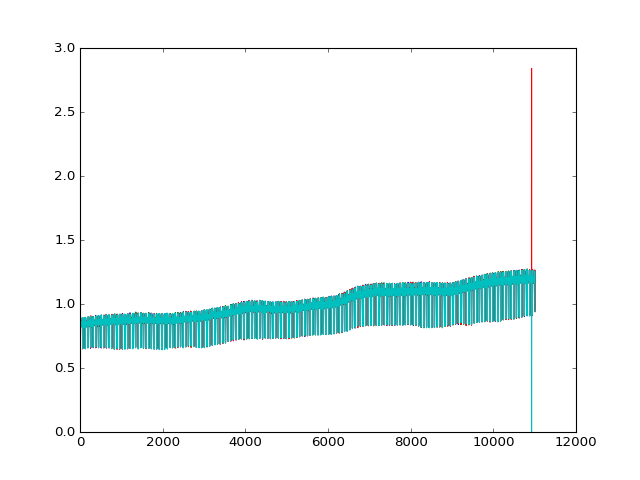

In [14]:
# You can now easily slice and plot parts of the array in the usual manner
# If you want to plot the solutions for all timestamps of the first antenna
from matplotlib import pyplot as plt
plt.figure()
plt.plot(values[0,:,:])
plt.show()

<IPython.core.display.Javascript object>


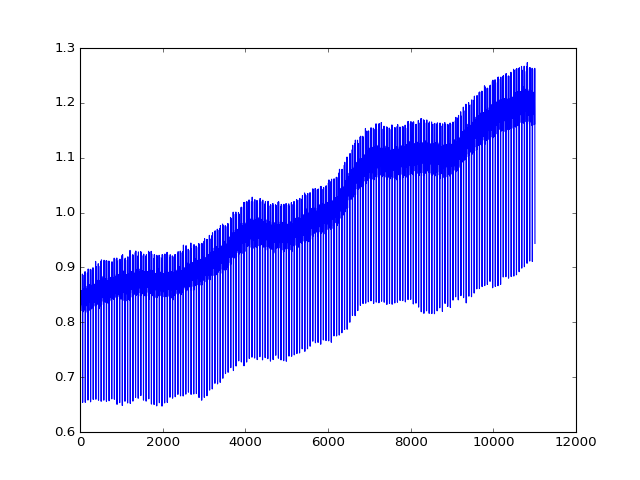

In [15]:
# Or only for the first solution interval
from matplotlib import pyplot as plt
plt.figure()
plt.plot(values[0,:,0])
plt.show()

In [16]:
# You can also convert the gains(amplitude, phase) and the delays to a numpy array
# Amplitude, phase:
gains, times = subs.readmirlog.get_gains(ccal.crosscaldir + '/' + ccal.fluxcal)
# The values are ordered in (antenna, solution interval, amplitude[0] or phase[1]) order
print(gains)

[[[   0.189   92.268]
  [   0.189   89.42 ]
  [   0.189   86.608]
  [   0.19    82.02 ]]

 [[   0.195 -112.632]
  [   0.195 -114.651]
  [   0.195 -115.651]
  [   0.195 -118.458]]

 [[   0.208    0.   ]
  [   0.208   -0.   ]
  [   0.208   -0.   ]
  [   0.208    0.   ]]

 [[   0.226  142.283]
  [   0.226  142.85 ]
  [   0.226  143.228]
  [   0.226  142.5  ]]

 [[   0.222  -62.295]
  [   0.222  -61.648]
  [   0.223  -61.797]
  [   0.223  -62.04 ]]

 [[   0.206 -158.081]
  [   0.206 -156.421]
  [   0.206 -154.005]
  [   0.206 -150.745]]

 [[   0.505   -0.198]
  [   0.505    1.413]
  [   0.       0.   ]
  [   0.       0.   ]]

 [[   0.221 -111.067]
  [   0.222 -106.703]
  [   0.222 -104.205]
  [   0.223  -96.641]]]


<IPython.core.display.Javascript object>


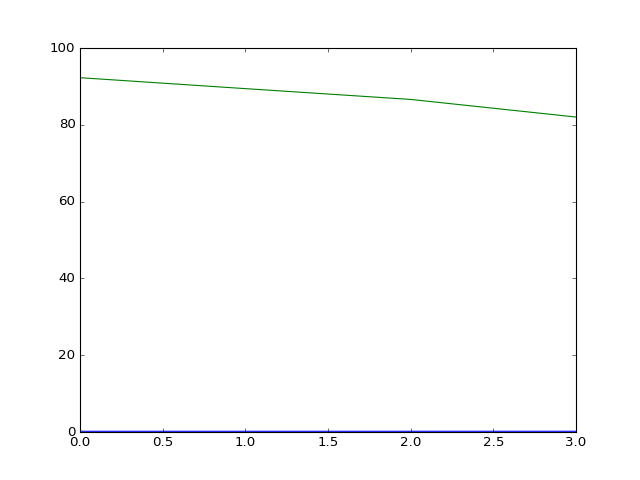

In [19]:
# times is a datetime instance with the actual timestamps of the solution interval
# matplotlib can use them
# Let's plot the phase gains of the first antenna
from matplotlib import pyplot as plt
plt.figure()
plt.plot(gains[0,:,:])
plt.show()

In [18]:
# If you solved for delays above you can also load them as a numpy array
delays, times = subs.readmirlog.get_delays(ccal.crosscaldir + '/' + ccal.fluxcal)
# The values are ordered in (antenna, solution interval) order. The unit is nanoseceonds.